In [122]:
import h5py 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in data from z=0 
data = {}
file = h5py.File("../data/lowmass_major_99.hdf5",'r')
for key, val in file.items():
    if key =="Header":
        continue
    data[key] = np.array(val)

file.close()

In [3]:
# positions are in physical separations (kpc) 
pos1 = data['Sub1 Pos'][0]
pos2 = data['Sub2 Pos'][0]

In [4]:
# defining origin for our observations
origin_vec = np.array([55000,55000,55000]) # in Mpc

In [5]:
# calculating vectors wrt "origin"
diff1 = origin_vec - pos1
diff2 = origin_vec - pos2

In [6]:
# calculating distance to both galaxies
len1 = np.linalg.norm(diff1)
len2 = np.linalg.norm(diff2)
print(f"Distance to pair: {len1:.2f}, {len2:.2f} in Mpc")

Distance to pair: 55379.41, 55499.46 in Mpc


In [7]:
# calculate average distance to pair
average_dist = np.mean((len1,len2))
print(f"Average distance to pair: {average_dist:.2f} Mpc")

Average distance to pair: 55439.43 Mpc


the angular separation between two vectors is given by 
$$ \vec{r_1}\cdot{}\vec{r_2} = |r_1||r_2|\cos\theta$$

In [8]:
# calculate angular separation
dot_product = diff1@diff2 #dot product between distance vectors

mags = len1*len2 

angsep_inrad = np.arccos(dot_product/mags)
angsep_indeg = angsep_inrad*180/np.pi
print(f"Angular separation is: {angsep_indeg} deg")

angsep_inarcmin = angsep_indeg*60
print(f"Angular separation is: {angsep_inarcmin:0.3f} arcmin")

Angular separation is: 0.21940174317522043 deg
Angular separation is: 13.164 arcmin


In [9]:
# calculate physical separation
phys_sep = np.linalg.norm(pos1-pos2)
print(f"The physical separation of the galaxies is {phys_sep:0.2f} kpc")

The physical separation of the galaxies is 243.89 kpc


In [10]:
# calculated projected separation:
# COULD use the small angle approximation? but that might give pretty significant differences in projected separation since distances are so large. 
proj_sep = 2*average_dist*np.tan(angsep_inrad/2)
print(f"The projected separation of the galaxies is {proj_sep:0.2f} kpc")

# comparing to using small angle approximation
# proj_sep_saa = average_dist*angsep_inrad
# print(f"The projected separation of the galaxies is {proj_sep_saa:0.2f} kpc") 
# okay so small angle would probably be just fine. oh well.


The projected separation of the galaxies is 212.29 kpc
The projected separation of the galaxies is 212.29 kpc


In [11]:
# calculating relative line-of-sight velocity
vel1 = data["Sub1 Vel"][0]
vel2 = data["Sub2 Vel"][0]

In [12]:
# calculate total velocity
print(f"Relative velocity is {np.linalg.norm(vel1-vel2):0.2f} km/s")

Relative velocity is 146.55 km/s


The scalar projection of vector $\vec{v_1}$ onto $\vec{r_1}$ is given by:
$$v_{LOS} = \frac{\vec{v_1}\cdot\vec{r_1}}{|r_1|}$$

In [13]:
# calculate line of sight velocity of gal 1 wrt the diff vector from origin to pos1
vlos1 = (vel1@diff1)/np.linalg.norm(diff1)
vlos2 = (vel1@diff2)/np.linalg.norm(diff2)

print(f"Line-of-sight velocity of gal1 is {vlos1:.2f} km/s and of gal2 is {vlos2:.2f} km/s")

Line-of-sight velocity of gal1 is -261.05 km/s and of gal2 is -259.28 km/s


In [14]:
# calculate relative LOS velocity difference between two galaxies:
rel_vlos = vlos1-vlos2
print(f"The relative line of sight velocity is {rel_vlos:.2f} km/s")

The relative line of sight velocity is -1.76 km/s


## Database

From this point on, I reuse variable names for ease, so don't try to rerun the above without first redefining variables. I know this is bad practice. :)

In [71]:
pos1 = data["Sub1 Pos"]
pos2 = data["Sub2 Pos"]


389

In [45]:
# compute the relative position vectors with respect to the "origin"
rel1 = pos1 - origin_vec
rel2 = pos2 - origin_vec

data["Sub1 Relative Pos"] = rel1
data["Sub2 Relative Pos"] = rel2

In [70]:
# add physical separations to dictionary
data["Physical Separation"] = np.linalg.norm(rel1-rel2,axis=1)
print(f"Length of physical separations: {len(data["Physical Separation"])}")

# add average distance to galaxies
len1 = np.linalg.norm(rel1, axis=1) # in kpc
len2 = np.linalg.norm(rel2, axis=1) # in kpc

average_dist = np.mean((len1,len2),axis=0)
print(f"Length of averages array: {len(average_dist)}")

data["Average Distance"] = average_dist # in kpc

Length of physical separations: 389
Length of averages array: 389


In [82]:
# calculate angular separation
dot_product = np.sum(rel1*rel2,axis=1) #dot product between distance vectors
print(f"Length of dot product array: {len(dot_product)}")

mags = len1*len2 
angsep_inrad = np.arccos(dot_product/mags)
angsep_indeg = angsep_inrad*180/np.pi

data["Angular Separation [rad]"] = angsep_inrad
data["Angular Separation [deg]"] = angsep_indeg


Length of dot product array: 389


In [85]:
# finally, add the projected separations to the dictionary 
proj_sep = 2*average_dist*np.tan(angsep_inrad/2)
data["Projected Separation"] = proj_sep
print(f"Length of projected separation array: {len(proj_sep)}")


Length of projected separation array: 389


### Relative LOS velocity 
note: (all values in km/s)

In [105]:
# define velocity arrays
vel1 = data["Sub1 Vel"]
vel2 = data["Sub2 Vel"]

# calculate relative velocity wrt galaxies
relvel = np.linalg.norm(vel1-vel2,axis=1)
data["Relative Velocity"] = relvel

In [106]:
# project velocity onto line of sight vector
vlos1 = np.sum(vel1*rel1,axis=1)/np.linalg.norm(rel1, axis=1)
vlos2 = np.sum(vel2*rel2,axis=1)/np.linalg.norm(rel2, axis=1)

# relative line of sight velocity is the difference between these ^
rel_vlos = vlos1-vlos2
data["Relative LOS Velocity"] = rel_vlos

In [107]:
data.keys()

dict_keys(['Comoving Separation', 'Group ID', 'Group Mass', 'Group Nsubs', 'Group Radius', 'Realization', 'RelVel', 'Separation', 'Stellar Mass Ratio', 'Sub1 BHMass', 'Sub1 BHMdot', 'Sub1 GasMetallicity', 'Sub1 ID', 'Sub1 Mass', 'Sub1 MassType', 'Sub1 Pos', 'Sub1 SFR', 'Sub1 SFRinRad', 'Sub1 Stellar Mass', 'Sub1 Vel', 'Sub2 BHMass', 'Sub2 BHMdot', 'Sub2 GasMetallicity', 'Sub2 ID', 'Sub2 Mass', 'Sub2 MassType', 'Sub2 Pos', 'Sub2 SFR', 'Sub2 SFRinRad', 'Sub2 Stellar Mass', 'Sub2 Vel', 'TripleFlag', 'Sub1 Relative Pos', 'Sub2 Relative Pos', 'Physical separation', 'Physical Separation', 'Average Distance', 'Angular Separation [rad]', 'Angular Separation [deg]', 'Projected Separation', 'Relative LOS Velocity', 'Relative Velocity'])

In [110]:
# create new dataframe to use as pandas DF and store as csv file
keywords = ["Stellar Mass Ratio","Sub1 Mass","Sub1 Stellar Mass","Sub2 Mass","Sub2 Stellar Mass","Physical Separation","Average Distance","Angular Separation [rad]", "Angular Separation [deg]", "Projected Separation",'Relative LOS Velocity','Relative Velocity']
new_data = {}
for key in keywords:
    new_data[key] = data[key]
    


In [128]:
# create pandas dataframe and save as csv
df = pd.DataFrame(new_data)

df.to_csv("../data/lowmass_major.csv")


## Exploratory data analysis

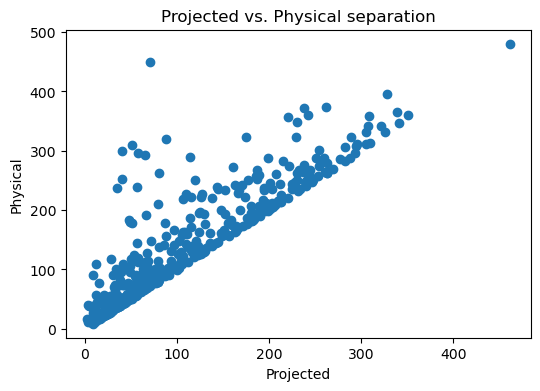

In [121]:
# look at projected vs. physical separation
proj = df["Projected Separation"]
phys = df["Physical Separation"]

fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(proj,phys)
ax.set_title("Projected vs. Physical separation")
ax.set(xlabel="Projected", ylabel="Physical")
plt.show()

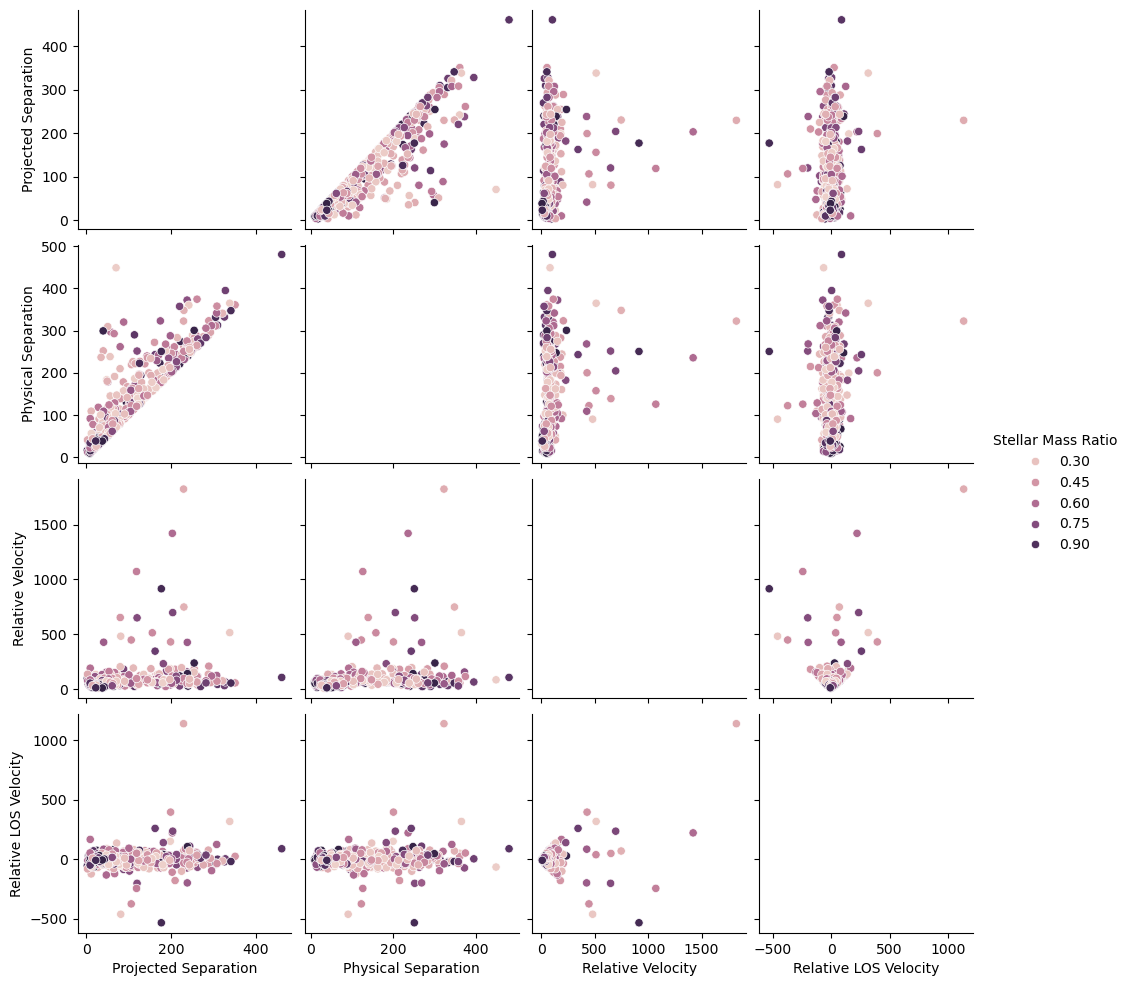

In [133]:
selected_data = ["Projected Separation","Physical Separation","Relative Velocity","Relative LOS Velocity","Stellar Mass Ratio"]

sns.pairplot(data=df[selected_data],hue="Stellar Mass Ratio")
plt.show()
# ax.set_title("Projected vs. Physical separation")
# ax.set(xlabel="Projected", ylabel="Physical")

---